In [9]:
import pandas as pd
import matplotlib.pyplot as plt

serie_temporelle = pd.read_csv("/Users/abdelwahed/projet-pfe-detecteur-fraude-carburant/grouped_data.csv", index_col = 'Mois')

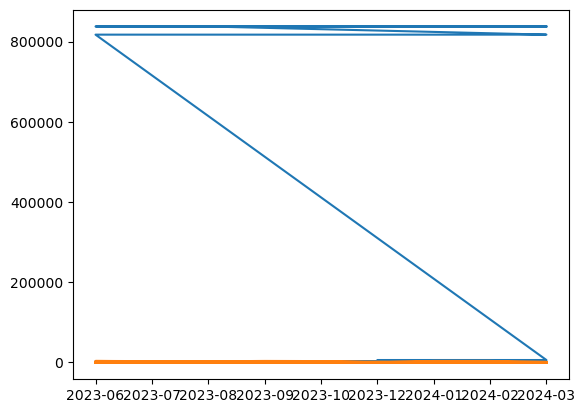

In [10]:
plt.plot(serie_temporelle)


In [11]:
from statsmodels.tsa.stattools import adfuller

_, p, _, _, _, _ = adfuller(serie_temporelle)
print("La p-value est de: ", round(p, 3))

ValueError: x is required to have ndim 1 but has ndim 2

In [12]:
from statsmodels.tsa.arima.model import ARIMA

arma = ARIMA(serie_temporelle, order=(1,0,3)).fit()

arma.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: SARIMAX models require univariate `endog`. Got shape (551, 2).

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


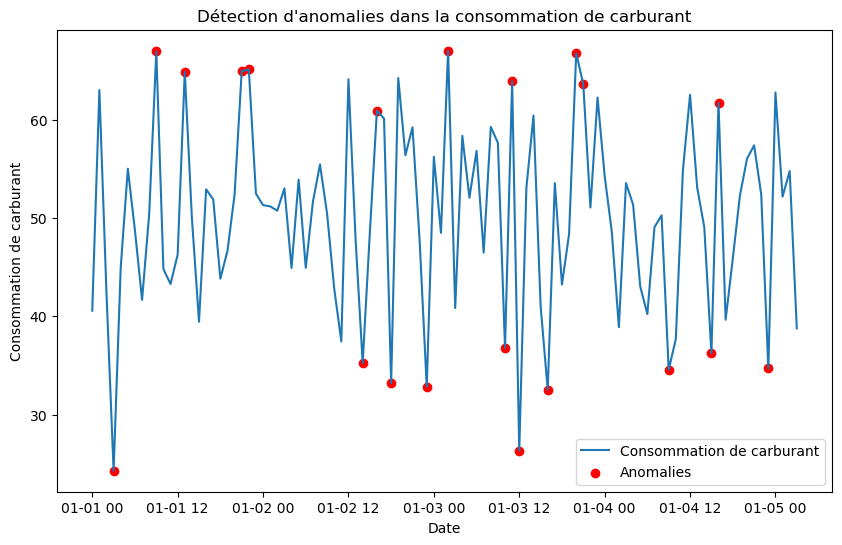

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Exemple de données de consommation de carburant (à adapter avec vos propres données)
dates = pd.date_range(start='2023-01-01', periods=100, freq='H')
fuel_consumption = np.random.normal(loc=50, scale=10, size=100)

# Création d'un DataFrame
df = pd.DataFrame({'Date': dates, 'Fuel_Consumption': fuel_consumption})

# Entraînement du modèle Isolation Forest
model = IsolationForest(contamination=0.2)  # 5% d'anomalies
model.fit(df[['Fuel_Consumption']])

# Prédiction des anomalies
df['Anomaly'] = model.predict(df[['Fuel_Consumption']])

# Visualisation des anomalies
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Fuel_Consumption'], label='Consommation de carburant')
plt.scatter(df['Date'][df['Anomaly'] == -1], df['Fuel_Consumption'][df['Anomaly'] == -1], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Consommation de carburant')
plt.title('Détection d\'anomalies dans la consommation de carburant')
plt.legend()
plt.show()


#### Extra partie - grouper les données par mois

In [ ]:
#essayer de voir pour chaque matricule les mois presents
matricules = gp2_carburant['matricule'].unique()

for mat in matricules :
    
    months = []
    sub_df = gp2_carburant[gp2_carburant['matricule'] == mat]
    sub_df['date'] = pd.to_datetime(sub_df['date'])
    
    for row in sub_df :
        months.append(sub_df["date"].dt.month)
    print('les mois disponibles pour la véhicule ', mat,":")
    #print(months)

        


In [ ]:
# Convertir la colonne de date en type datetime
gp2_carburant['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')

# Ajouter une colonne pour le mois
gp2_carburant['Mois'] = gp2_carburant['date'].dt.to_period('M')

# Groupement par véhicule et mois
grouped_data = gp2_carburant.groupby(['matricule', 'Mois']).agg({'quantite': 'sum'}).reset_index()

# Afficher les mois disponibles pour chaque véhicule
mois_disponibles = grouped_data.groupby('matricule')['Mois'].unique()
print(mois_disponibles)
grouped_data.head(5)

In [ ]:
grouped_data.to_csv('grouped_data_1.csv', index=False)

#### autre extra partie - max diff date 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charge tes données depuis un fichier ou une source de données
# Suppose que tu as une DataFrame pandas appelée 'df' avec une colonne 'date_time' contenant les dates et heures exactes de chaque transaction
df = pd.read_csv('/Users/abdelwahed/projet-pfe-detecteur-fraude-carburant/gp2_carburant_transformed.csv',delimiter =';')
print(df)
df = df[df['matricule'] == 218]
print(len(df))
# Convertis la colonne 'date_time' en type datetime si elle n'est pas déjà convertie
df['date'] = pd.to_datetime(df['date'])

# Trie ta DataFrame par ordre chronologique si ce n'est pas déjà fait
df.sort_values(by='date', inplace=True)

# Calcule la différence entre chaque date consécutive
diff_dates = df['date'].diff()

# Trouve la différence maximale entre deux dates consécutives
max_diff = diff_dates.max()

# Affiche la fréquence maximale entre les transactions
print("La fréquence maximale entre deux transactions est :", max_diff)


#### 3eme extra partie  - réecantionnage de données par semaine

In [ ]:
df4 = pd.read_csv('/Users/abdelwahed/projet-pfe-detecteur-fraude-carburant/gp2_carburant_transformed.csv')

df4['date'] = pd.to_datetime(df4['date'], format='%Y/%m/%d %H:%M')
df4.set_index('date', inplace=True)


# Rééchantillonne tes données à une fréquence hebdomadaire
# Ici, 'W' signifie chaque semaine
df_mat = df4[df4['matricule'] == 218]
print(df_mat)
df_resampled = df_mat.resample('W').sum() 
df_resampled

#### Hiérarchical clustering

ici, importer les données

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
dataclustering = df[['matricule','quantite','fournisseur','typePaiement']]
clusters = 2
cls = linkage(dataclustering, method = 'ward')
y_pred = fcluster(cls, t=clusters, criterion='maxclust')
print(y_pred)

dendrogram(cls)
plt.show()

In [ ]:
dataclustering['predicted_class'] =  y_pred
dataclusteringa